# Tier 2. Module 2: Numerical Programming in Python

## Topic 5 - Vector space and differentiation in mathematical analysis
## Homework

In this task, gradient descent is used to construct a polynomial regression. It will be necessary to generate a data set for computational experiments and programmatically implement several variants of the gradient descent method: `SGD`, `RMSProp`, `Adam`, `Nadam`. During computational experiments, it is necessary to compare the speed of operation and the required number of iterations for each of the options.

This will help to consolidate the following skills:

* Gradient, using the gradient descent method.
* Optimization in machine learning.

### Task

Data will need to be generated for this task. For 100 random features $x_1$, $x_2$, you need to calculate $y$ as a polynomial of the 2nd degree. For example,

$4x_1^2 + 5x_2^2 − 2x_1x_2 + 3x_1 − 6x_2$.

As a result, we will get an array of features with dimension (100, 2) and an array of the target variable with dimension (100,).

To complete the task, the following steps should be performed:

#### 1. Generate data

* Use the function `np.random.rand()` to generate 100 random values ​​of features $x_1$, $x_2$.
* Implement the function `polynomial(x1, x2)` to compute the target variable $y$ by the specified polynomial.

In [65]:
import numpy as np

np.random.seed(42)  # random seed for reproducibility

X = np.random.rand(100, 2)


def polynomial(x1, x2):
    return 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2


y = polynomial(X[:, 0], X[:, 1])

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [66]:
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

#### 2. Generate additional features for each power

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(100, 5)

In [68]:
X_poly

array([[3.74540119e-01, 9.50714306e-01, 1.40280301e-01, 3.56080649e-01,
        9.03857692e-01],
       [7.31993942e-01, 5.98658484e-01, 5.35815131e-01, 4.38214384e-01,
        3.58391981e-01],
       [1.56018640e-01, 1.55994520e-01, 2.43418162e-02, 2.43380530e-02,
        2.43342904e-02],
       [5.80836122e-02, 8.66176146e-01, 3.37370600e-03, 5.03106393e-02,
        7.50261116e-01],
       [6.01115012e-01, 7.08072578e-01, 3.61339257e-01, 4.25633056e-01,
        5.01366775e-01],
       [2.05844943e-02, 9.69909852e-01, 4.23721405e-04, 1.99651038e-02,
        9.40725121e-01],
       [8.32442641e-01, 2.12339111e-01, 6.92960750e-01, 1.76760130e-01,
        4.50878979e-02],
       [1.81824967e-01, 1.83404510e-01, 3.30603187e-02, 3.33475190e-02,
        3.36372142e-02],
       [3.04242243e-01, 5.24756432e-01, 9.25633424e-02, 1.59653074e-01,
        2.75369313e-01],
       [4.31945019e-01, 2.91229140e-01, 1.86576499e-01, 1.25794976e-01,
        8.48144121e-02],
       [6.11852895e-01, 1.3949

#### 3. Implement functions for gradient descent methods

* Implement the `polynomial_regression_gradient_descent()` function to calculate polynomial regression coefficients using the gradient descent method.
* Implement the `polynomial_regression_SGD()` function of the `SGD` variant of the gradient descent method.
* Implement the `polynomial_regression_rmsprop()` function of the `RMSProp` variant of the gradient descent method.
* Implement the `polynomial_regression_adam()` function of the `Adam` variant of the gradient descent method.
* Implement the `polynomial_regression_nadam()` function of the `Nadam` variant of the gradient descent method.

##### 3.1 - Basic Gradient Descent

In [69]:
def polynomial_regression_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    mse_history = []

    for e in range(epochs):
        predictions = X @ theta
        error = predictions - y
        mse = 1 / m * np.sum(error**2)
        mse_history.append(mse)

        gradient = 1 / m * X.T @ error
        theta -= learning_rate * gradient

    return theta, mse_history

##### 3.2 - Stochastic Gradient Descent (SGD)

In [70]:
def polynomial_regression_SGD(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    mse_history = []

    for e in range(epochs):
        for j in range(m):
            rand_index = np.random.randint(m)
            xi = X[rand_index : rand_index + 1]
            yi = y[rand_index : rand_index + 1]
            prediction = xi @ theta
            error = prediction - yi
            gradient = xi.T @ error
            theta -= learning_rate * gradient

        predictions = X @ theta
        mse = 1 / m * np.sum((predictions - y) ** 2)
        mse_history.append(mse)

    return theta, mse_history

##### 3.3 - RMSProp

In [71]:
def polynomial_regression_rmsprop(
    X, y, learning_rate=0.01, epochs=1000, beta=0.9, epsilon=1e-8
):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cache = np.zeros(X.shape[1])
    mse_history = []

    for e in range(epochs):
        predictions = X @ theta
        error = predictions - y
        mse = 1 / m * np.sum(error**2)
        mse_history.append(mse)

        gradient = 1 / m * X.T @ error
        cache = beta * cache + (1 - beta) * gradient**2
        theta -= learning_rate * gradient / (np.sqrt(cache) + epsilon)

    return theta, mse_history

##### 3.4 - Adam

In [72]:
def polynomial_regression_adam(
    X, y, learning_rate=0.01, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8
):
    m = len(y)
    theta = np.zeros(X.shape[1])
    m_t = np.zeros(X.shape[1])
    v_t = np.zeros(X.shape[1])
    mse_history = []

    for e in range(1, epochs + 1):
        predictions = X @ theta
        error = predictions - y
        mse = 1 / m * np.sum(error**2)
        mse_history.append(mse)

        gradient = 1 / m * X.T @ error
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * gradient**2

        m_t_hat = m_t / (1 - beta1**e)
        v_t_hat = v_t / (1 - beta2**e)

        theta -= learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

    return theta, mse_history

##### 3.5 - Nadam

In [73]:
def polynomial_regression_nadam(
    X, y, learning_rate=0.01, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8
):
    m = len(y)
    theta = np.zeros(X.shape[1])
    m_t = np.zeros(X.shape[1])
    v_t = np.zeros(X.shape[1])
    mse_history = []

    for e in range(1, epochs + 1):
        predictions = X @ theta
        error = predictions - y
        mse = 1 / m * np.sum(error**2)
        mse_history.append(mse)

        gradient = 1 / m * X.T @ error
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * gradient**2

        m_t_hat = m_t / (1 - beta1**e)
        v_t_hat = v_t / (1 - beta2**e)

        theta -= (
            learning_rate
            * (beta1 * m_t_hat + (1 - beta1) * gradient / (1 - beta1**e))
            / (np.sqrt(v_t_hat) + epsilon)
        )

    return theta, mse_history

#### 4. Calculate the running time of the implemented functions

In [74]:
print("Basic Gradient Descent")
%timeit polynomial_regression_gradient_descent(X_poly, y)
print("SGD")
%timeit polynomial_regression_SGD(X_poly, y, epochs=epochs)
print("RMSProp")
%timeit polynomial_regression_rmsprop(X_poly, y, epochs=epochs)
print("Adam")
%timeit polynomial_regression_adam(X_poly, y, epochs=epochs)
print("Nadam")
%timeit polynomial_regression_nadam(X_poly, y, epochs=epochs)

Basic Gradient Descent
9.82 ms ± 121 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
SGD
7.11 s ± 77.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
RMSprop
151 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adam
209 ms ± 9.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Nadam
248 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 5. Select the optimal number of iterations of each method variant

In [85]:
epochs = 5000

print("Basic Gradient Descent")
theta_gd, mse_gd = polynomial_regression_gradient_descent(X_poly, y, epochs=epochs)
print(theta_gd)

print("SGD")
theta_sgd, mse_sgd = polynomial_regression_SGD(X_poly, y, epochs=epochs)
print(theta_sgd)

print("RMSProp")
theta_rmsprop, mse_rmsprop = polynomial_regression_rmsprop(X_poly, y, epochs=epochs)
print(theta_rmsprop)

print("Adam")
theta_adam, mse_adam = polynomial_regression_adam(X_poly, y, epochs=epochs)
print(theta_adam)

print("Nadam")
theta_nadam, mse_nadam = polynomial_regression_nadam(X_poly, y, epochs=epochs)
print(theta_nadam)

Basic Gradient Descent
[ 2.08082206 -2.1119767   3.23288381  0.19707638 -0.12650638]
SGD
[ 2.99998455 -5.9999823   4.00001369 -1.99999817  4.99998101]
RMSprop
[ 3.00499999 -5.99500001  4.00499999 -1.99500002  5.00499999]
Adam
[ 2.99553963 -5.99664968  4.00475877 -2.00036897  4.99687108]
Nadam
[ 2.99690799 -5.99769083  4.00330489 -2.00026213  4.99784839]


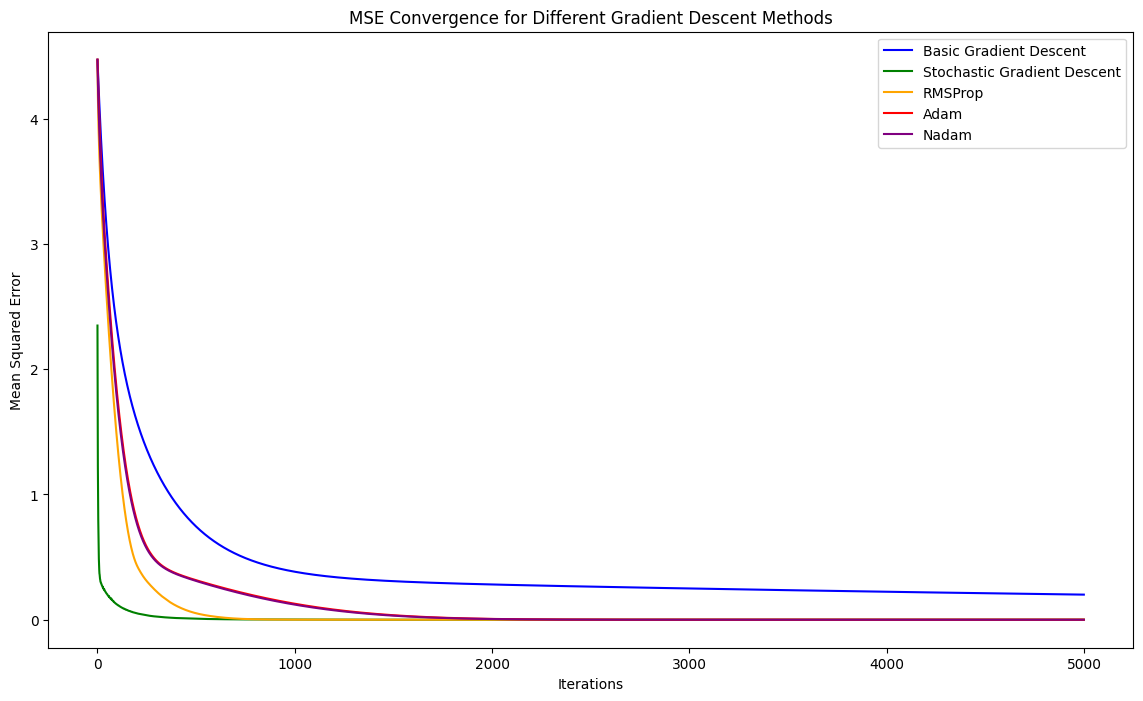

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(mse_gd, label='Basic Gradient Descent', color='blue')
plt.plot(mse_sgd, label='Stochastic Gradient Descent', color='green')
plt.plot(mse_rmsprop, label='RMSProp', color='orange')
plt.plot(mse_adam, label='Adam', color='red')
plt.plot(mse_nadam, label='Nadam', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE Convergence for Different Gradient Descent Methods')
plt.legend()
plt.show()

#### 6. Conclusion

* Basic Gradient Descient and SGD are absolutely the two fastest methods in terms of cycle time, however, even after 5000 epochs, basic gradient descient still does not find the correct polynomial weights.
* SGD managed to find the correct weights and minimize MSE to zero in less than 500 epochs, RMSProp took 800 epochs.
* Gradient Descients with optimizers Adam and Nadam were also able to complete the task with the same efficiency at 1800 epochs, despite Nadan being the slowest method with the longest epoch time.
* From all of the above, we can conclude that Stochastic Gradient Descent is optimal for this specific task.